### Test time complexity vs linear chain size for a clean system

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from fuNEGF.models import LinearChain
import timeit
from scipy.optimize import curve_fit

In [2]:
# static parameters
eps_0 = 0
t = 1
a = 1

## Calculate the time complexity

c:\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


[4.45470009e-02 7.83767499e-04 2.16690708e+00]


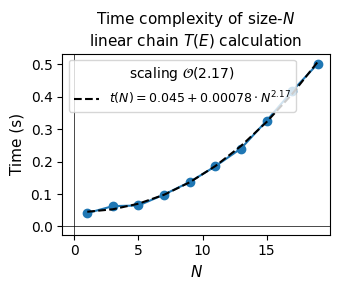

In [36]:
N_all = np.arange(1, 20, 2)
times_all = []

fig, ax = plt.subplots(1, 1, figsize=(3.5, 3))

for N in N_all:
    def time_func():
        chain = LinearChain(N, eps_0, t, a, plot_dispersion=False)
        chain.plot_transmission(ax=ax)

    t = timeit.timeit(lambda: time_func(), number=30)
    times_all.append(t)

plt.close()

# fit data with a power law
def power_law(x, a, b, c):
    return a + b * np.power(x, c)
N_all = np.array(N_all)
times_all = np.array(times_all)
p0 = [0, 0.01, 1]
p = curve_fit(power_law, N_all, times_all, p0=p0)[0]

fig, ax = plt.subplots(1, 1, figsize=(3.5, 3))
plt.plot(N_all, times_all, 'o-')
plt.plot(N_all, power_law(N_all, *p), 'k--', label=f'$t(N) = {p[0]:.2g} + {p[1]:.2g}' + r' \cdot N^{' + f'{p[2]:.2f}' + r'} $')
plt.xlabel(r'$N$', fontsize=11)
plt.ylabel('Time (s)', fontsize=11)
plt.legend(title=r'scaling $\mathcal{O}(' + f'{p[2]:.3g}' + r')$', loc='upper left', fontsize=9)
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.title(r'Time complexity of size-$N$ ' + '\n' + r'linear chain $T(E)$ calculation', fontsize=11)
plt.tight_layout()

    